# Gene Corelation Graph

*I can write markdown here*

**Ohh but it does become live when I exit this cell**

but it's not live. But okays.
It also has command and edit mode, and like a fuckton of shortcuts. So I like this. 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize


In [7]:
#cancers = ['BRCA','CESC','CHOL','COAD','ESCA','GBM','HNSC','KICH','KIRC','KIRP','LGG','LIHC','LUAD','LUSC','PAAD','PRAD','PCPG','READ','SARC','SKCM','STAD','THCA','THYM','UCEC']
cancers = ['CHOL']

In [11]:
for i in cancers:
   print(i)
   #df2 = pd.read_csv('data/mRNA_exp_Normal_RAW_txt/'+i+'_normal.txt', sep='\t', header=None)
   df2 = pd.DataFrame(pd.read_csv('data/mRNA_exp_Normal_RAW_txt/'+i+'_normal.txt',delim_whitespace=True,header=0 ))
   print(df2)
    

CHOL
                  gene_id   gene_name       gene_type  \
1      ENSG00000000003.15      TSPAN6  protein_coding   
2       ENSG00000000005.6        TNMD  protein_coding   
3      ENSG00000000419.13        DPM1  protein_coding   
4      ENSG00000000457.14       SCYL3  protein_coding   
5      ENSG00000000460.17    C1orf112  protein_coding   
...                   ...         ...             ...   
60660   ENSG00000288675.1  AP006621.6  protein_coding   
60661         N_ambiguous         NaN             NaN   
60662      N_multimapping         NaN             NaN   
60663         N_noFeature         NaN             NaN   
60664          N_unmapped         NaN             NaN   

       unstranded_TCGA-W5-AA2X-11A-11R-A41I-07  \
1                                         2322   
2                                            0   
3                                          716   
4                                          315   
5                                           73   
...       

In [14]:
    df2

,gene_id,gene_name,gene_type,unstranded_TCGA-W5-AA2X-11A-11R-A41I-07,unstranded_TCGA-W5-AA2Q-11A-11R-A41I-07,unstranded_TCGA-W5-AA30-11A-11R-A41I-07,unstranded_TCGA-ZU-A8S4-11A-11R-A41I-07,unstranded_TCGA-W5-AA2R-11A-11R-A41I-07,unstranded_TCGA-W5-AA31-11A-11R-A41I-07,unstranded_TCGA-W5-AA2I-11A-11R-A41I-07,...,fpkm_unstranded_TCGA-W5-AA34-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA2X-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA2Q-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA30-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-ZU-A8S4-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA2R-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA31-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA2I-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA2U-11A-11R-A41I-07,fpkm_uq_unstranded_TCGA-W5-AA34-11A-11R-A41I-07
1,ENSG00000000003.15,TSPAN6,protein_coding,2322,1918,3075,4088,3529,4394,4679,...,20.3321,27.4014,29.7467,37.7385,50.6671,38.1211,44.9008,56.5551,31.5610,43.9314
2,ENSG00000000005.6,TNMD,protein_coding,0,3,1,0,1,6,0,...,0.0000,0.0000,0.1430,0.0377,0.0000,0.0332,0.1884,0.0000,0.0394,0.0000
3,ENSG00000000419.13,DPM1,protein_coding,716,463,635,740,718,859,648,...,15.4979,31.7533,26.9859,29.2872,34.4678,29.1477,32.9877,29.4347,31.4588,33.4861
4,ENSG00000000457.14,SCYL3,protein_coding,315,259,313,261,284,450,295,...,1.3282,2.4497,2.6472,2.5315,2.1318,2.0217,3.0304,2.3498,2.3570,2.8699
5,ENSG00000000460.17,C1orf112,protein_coding,73,59,81,143,57,108,35,...,0.1990,0.6545,0.6953,0.7553,1.3466,0.4678,0.8385,0.3214,0.2727,0.4301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60660,ENSG00000288675.1,AP006621.6,protein_coding,11,6,10,7,5,3,2,...,0.0684,0.3505,0.2512,0.3314,0.2342,0.1458,0.0828,0.0653,0.0346,0.1479
60661,N_ambiguous,NaN,NaN,4001510,3158449,4533567,4723080,4592358,4818062,4449325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60662,N_multimapping,NaN,NaN,4167621,3103331,4840445,5850925,4315951,4530399,5089317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60663,N_noFeature,NaN,NaN,1617061,732211,1015225,953169,1106152,1396684,1351244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# for i in cancers:
#     print(i)

#     #df2 = pd.read_csv('data/mRNA_exp_Normal_RAW_txt/'+i+'_normal.txt', sep='\t', header=None)
#     df2 = pd.DataFrame(pd.read_csv('data/normal_LTA/'+i+'_normal_LTA_csv.csv',header=0 ))
#     print(df2.head())
#     print(df2.columns)

In [37]:
#     df2 = df2.loc[df2['Unnamed: 0'].str.startswith('fpkm_unstranded',na=False)] #This deletes entries not starting with 'fpkm_unstranded'
#     df2['Unnamed: 0'] = df2['Unnamed: 0'].map(lambda x: x.lstrip('-11A')) #This section deletes parts of string other than patient barcode.
#     df2['Unnamed: 0'] = df2['Unnamed: 0'].map(lambda x: x.lstrip('fpkm_unstranded'))
#     df2['Unnamed: 0'] = df2['Unnamed: 0'].map(lambda x: str(x)[:-16])
#     print(df2)

In [36]:
    df3 = df2[df2['gene_type']=='protein_coding']
   # print(df2['gene_type'])
    print(df3)

                  gene_id   gene_name       gene_type  \
1      ENSG00000000003.15      TSPAN6  protein_coding   
2       ENSG00000000005.6        TNMD  protein_coding   
3      ENSG00000000419.13        DPM1  protein_coding   
4      ENSG00000000457.14       SCYL3  protein_coding   
5      ENSG00000000460.17    C1orf112  protein_coding   
...                   ...         ...             ...   
60651   ENSG00000288661.1  AL451106.1  protein_coding   
60656   ENSG00000288669.1  AC008763.4  protein_coding   
60658   ENSG00000288671.1  AC006486.3  protein_coding   
60659   ENSG00000288674.1  AL391628.1  protein_coding   
60660   ENSG00000288675.1  AP006621.6  protein_coding   

       unstranded_TCGA-W5-AA2X-11A-11R-A41I-07  \
1                                         2322   
2                                            0   
3                                          716   
4                                          315   
5                                           73   
...            

In [39]:
    corelations = df3.corr(method='pearson')

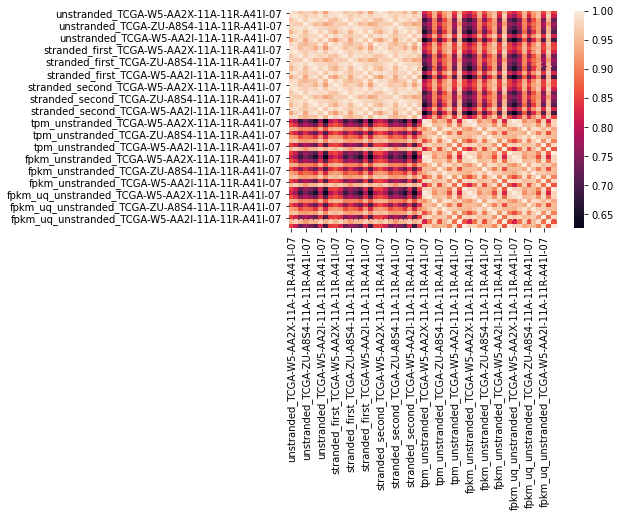

In [40]:
#print(corelations)
sns.heatmap(corelations)
plt.show()